In [1]:
import os
import pickle as pk
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape
from keras.models import Model, Sequential
from keras import backend as K
import numpy as np
from sklearn.cluster import KMeans
from time import time
from sklearn.model_selection import train_test_split
from skimage import transform
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
with open("D:\\vuchef\\electrica\\dirigido\\datos_filtrados.p","rb") as f:
    datos = pk.load(f)
print(np.shape(datos))
y = np.loadtxt('D:\\vuchef\\electrica\\dirigido\\clases.txt',delimiter = ',')
print(np.shape(y))

(31228, 63, 63)
(31228,)


In [3]:
# load json and create model
json_file = open('D:\\vuchef\\electrica\\dirigido\\final\\model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
# load weights into new model
autoencoder.load_weights("D:\\vuchef\\electrica\\dirigido\\final\\model.h5")
print("Loaded model from disk")

W1015 10:17:08.753810 17564 deprecation_wrapper.py:119] From C:\Users\danie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1015 10:17:08.787721 17564 deprecation_wrapper.py:119] From C:\Users\danie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1015 10:17:08.965278 17564 deprecation_wrapper.py:119] From C:\Users\danie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W1015 10:17:09.214578 17564 deprecation_wrapper.py:119] From C:\Users\danie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1015 10:17:09.215608 17564 de

Loaded model from disk


In [4]:
def resize_batch(imgs):
    imgs = imgs.reshape((-1, 63, 63, 1))
    resized_imgs = np.zeros((imgs.shape[0], 64, 64, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (64, 64))
    return resized_imgs


In [5]:
nuevo = resize_batch(datos)
print(np.shape(nuevo))

(31228, 64, 64, 1)


In [6]:
# load json and create model
json_file = open('D:\\vuchef\\electrica\\dirigido\\final\\encoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
encoder = model_from_json(loaded_model_json)
# load weights into new model
encoder.load_weights("D:\\vuchef\\electrica\\dirigido\\final\\encoder.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
# load json and create model
json_file = open('D:\\vuchef\\electrica\\dirigido\\final\\decoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
decoder = model_from_json(loaded_model_json)
# load weights into new model
decoder.load_weights("D:\\vuchef\\electrica\\dirigido\\final\\decoder.h5")
print("Loaded model from disk")

Loaded model from disk


In [8]:
encoded_imgs = encoder.predict(nuevo)
decoded_imgs = decoder.predict(encoded_imgs)

# Separacion por clases

In [9]:
a = []
b = []
c = []
d = []
e = []
for i in range(np.shape(nuevo)[0]):
    if y[i]==0:
        a.append(i)
    elif y[i]==1:
        b.append(i)
    elif y[i]==2:
        c.append(i)
    elif y[i]==3:
        d.append(i)
    else:
        e.append(i)
print('AGN:',len(a),'SN:',len(b),'VS:',len(c),'Asteroid:',len(d),'Bogus',len(e))

AGN: 8721 SN: 987 VS: 9772 Asteroid: 9797 Bogus 1951


In [10]:
numero_datos = len(b)
clases = np.zeros(5*len(b))
prueba = np.zeros((len(b)*5,64,64,1))
for i in range(numero_datos):
    prueba[i,:,:,:] = nuevo[int(a[i]),:,:,:]
    clases[i] = 0
    prueba[numero_datos+i,:,:,:] = nuevo[int(b[i]),:,:,:]
    clases[numero_datos+i] = 1
    prueba[2*numero_datos+i,:,:,:] = nuevo[int(c[i]),:,:,:]
    clases[2*numero_datos+i] = 2
    prueba[3*numero_datos+i,:,:,:] = nuevo[int(d[i]),:,:,:]
    clases[3*numero_datos+i] = 3
    prueba[4*numero_datos+i,:,:,:] = nuevo[int(e[i]),:,:,:]
    clases[4*numero_datos+i] = 4

In [11]:
BOGUS_ls = np.zeros((len(e),1,1,10))
SN_ls = np.zeros((len(b),1,1,10))
BOGUS_r = np.zeros((len(e),64,64))
SN_r = np.zeros((len(b),64,64))
BOGUS = np.zeros((len(e),63,63))
SN = np.zeros((len(b),63,63))

In [12]:
for i in range(len(e)):
    valor = int(e[i])
    BOGUS_ls[i,:,:] = encoded_imgs[valor,:,:]
    BOGUS_r[i,:,:] = decoded_imgs[valor,:,:,0]
    BOGUS[i,:,:] = datos[valor,:,:]
    
for i in range(len(b)):
    valor = int(b[i])
    SN_ls[i,:,:] = encoded_imgs[valor,:,:]
    SN_r[i,:,:] = decoded_imgs[valor,:,:,0]
    SN[i,:,:] = datos[valor,:,:]

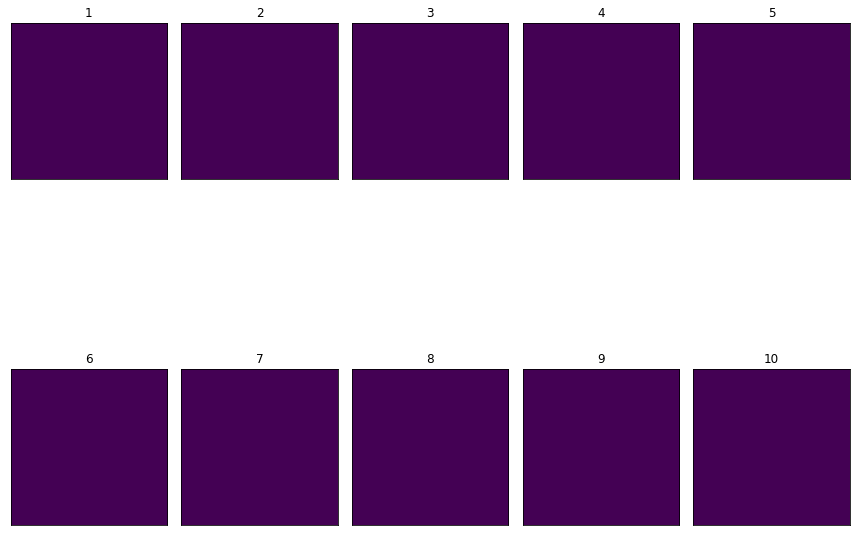

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


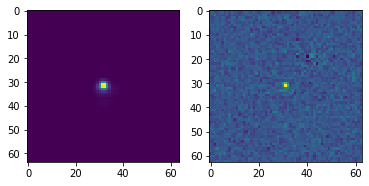

In [13]:
imagen = 22
methods = np.linspace(1,10,num=10).astype(int)


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})
j = 0
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(SN_ls[int(imagen),:,:,j])
    ax.set_title(str(interp_method))
    j=j+1

plt.tight_layout()
plt.show()


plt.subplot(121)


plt.subplot(121)
plt.imshow(SN_r[int(imagen),:,:])

plt.subplot(122)
plt.imshow(SN[int(imagen),:,:])
plt.show()

# Cluster sobre el espacio latente

In [14]:
flatten = Sequential()
flatten.add(encoder)
flatten.add(Flatten())

In [15]:
imagenes = flatten.predict(prueba)
print(np.shape(imagenes))

(4935, 10)


In [17]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Distintos valores de perplexity

In [47]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

W1012 21:46:57.048916 12540 legend.py:1282] No handles with labels found to put in legend.


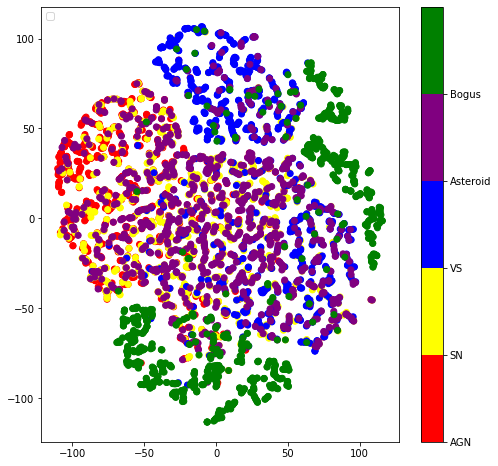

In [48]:
import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

In [49]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=10, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

W1012 21:47:49.656894 12540 legend.py:1282] No handles with labels found to put in legend.


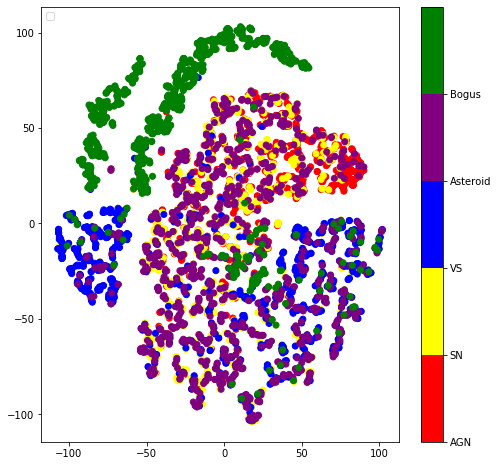

In [50]:
import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

In [51]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

W1012 21:48:40.849570 12540 legend.py:1282] No handles with labels found to put in legend.


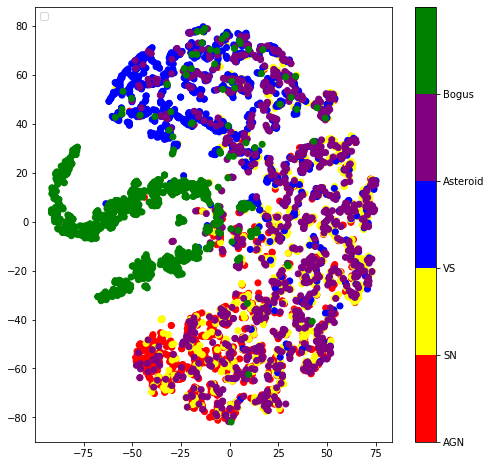

In [52]:
import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

In [53]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

W1012 21:49:48.151196 12540 legend.py:1282] No handles with labels found to put in legend.


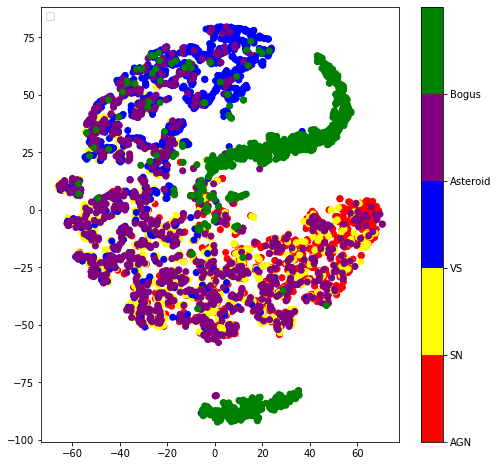

In [54]:
import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:50:54.837894 12540 legend.py:1282] No handles with labels found to put in legend.


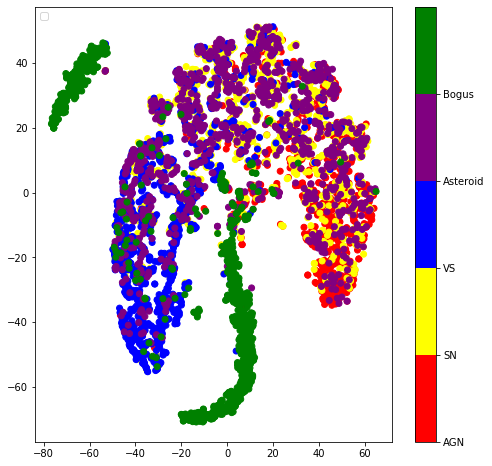

In [55]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:52:05.062445 12540 legend.py:1282] No handles with labels found to put in legend.


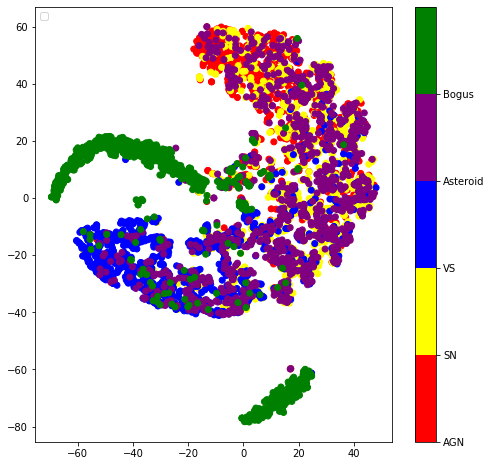

In [56]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:53:21.657571 12540 legend.py:1282] No handles with labels found to put in legend.


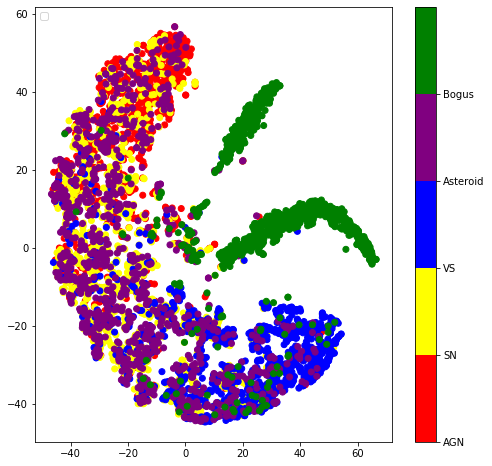

In [57]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=60, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:54:41.359947 12540 legend.py:1282] No handles with labels found to put in legend.


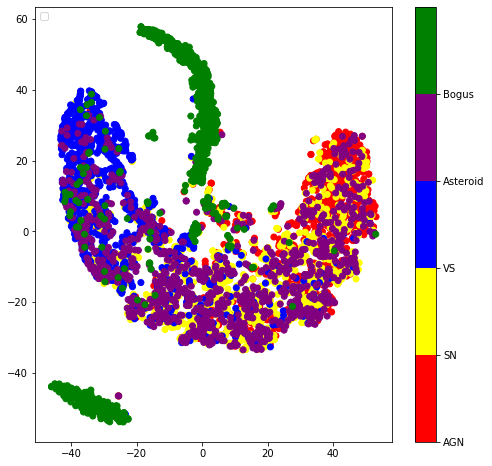

In [58]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=70, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:56:04.553379 12540 legend.py:1282] No handles with labels found to put in legend.


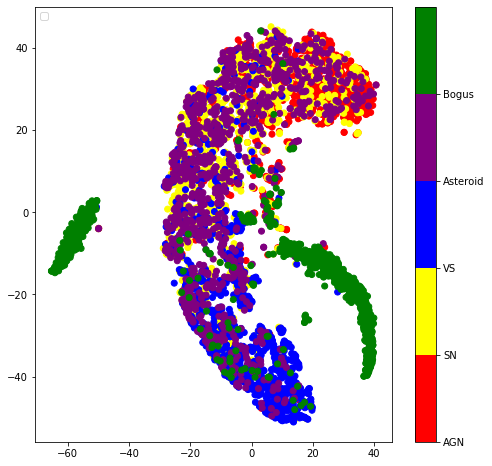

In [59]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:57:35.676544 12540 legend.py:1282] No handles with labels found to put in legend.


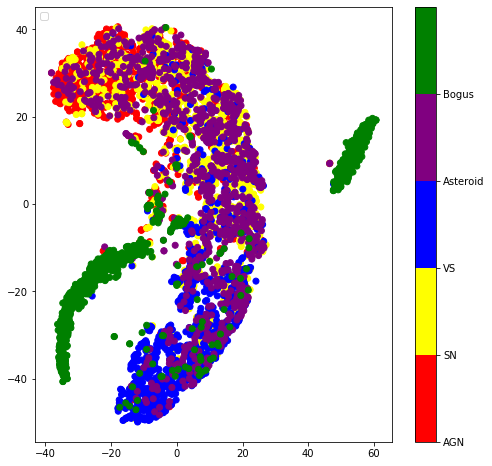

In [60]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=90, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 21:59:14.071526 12540 legend.py:1282] No handles with labels found to put in legend.


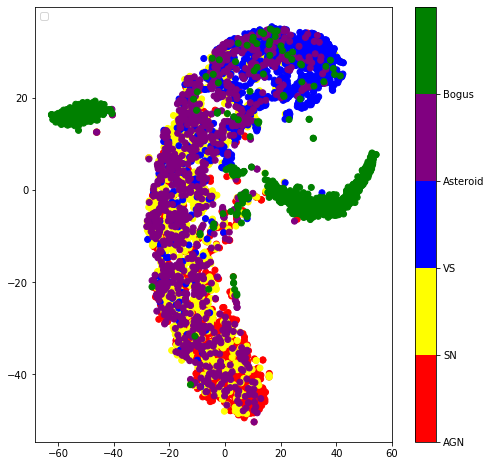

In [61]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

# Distintos learning rate, con perplexity = 80

W1015 10:21:53.199133 17564 legend.py:1282] No handles with labels found to put in legend.


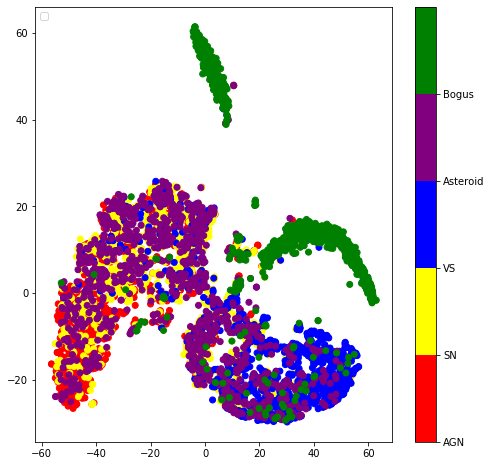

In [18]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=3000,learning_rate = 10)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:19:30.476175 12540 legend.py:1282] No handles with labels found to put in legend.


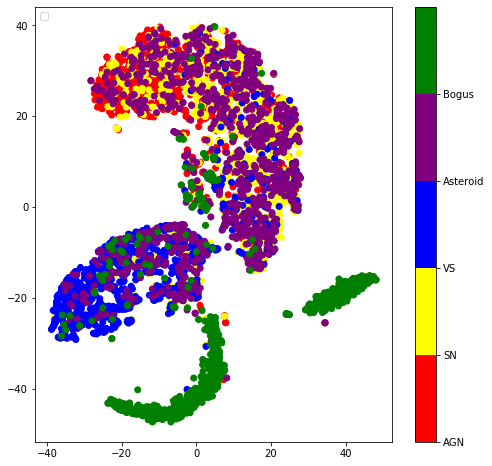

In [67]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 40)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:22:23.404046 12540 legend.py:1282] No handles with labels found to put in legend.


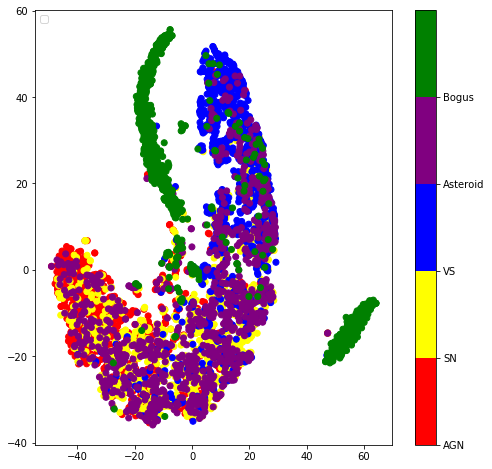

In [69]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 100)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:23:50.896556 12540 legend.py:1282] No handles with labels found to put in legend.


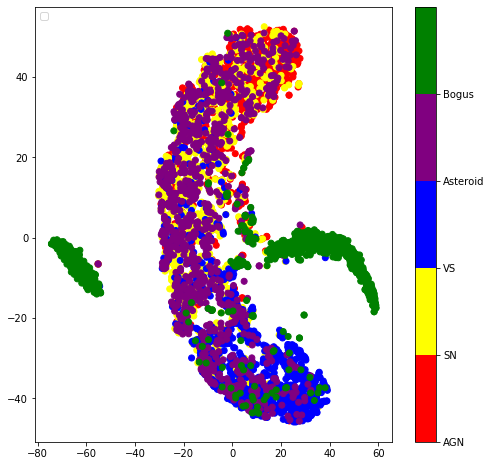

In [70]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 300)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:25:22.025780 12540 legend.py:1282] No handles with labels found to put in legend.


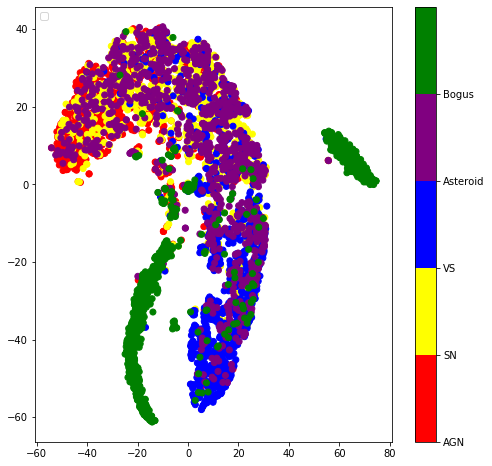

In [71]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 500)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:26:57.763935 12540 legend.py:1282] No handles with labels found to put in legend.


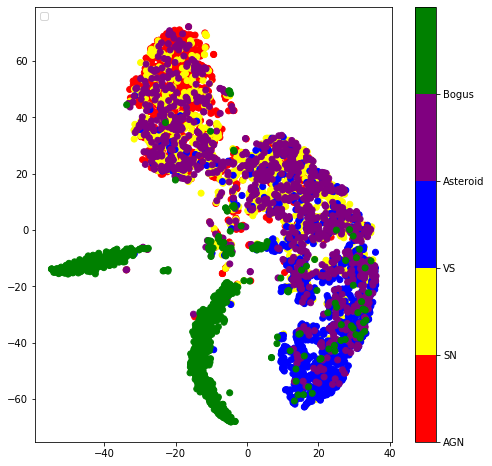

In [72]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 700)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:28:27.445377 12540 legend.py:1282] No handles with labels found to put in legend.


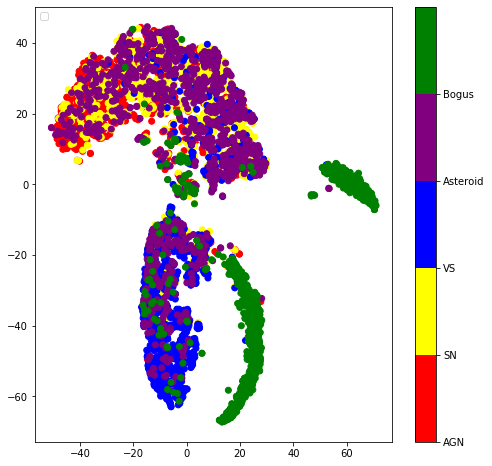

In [73]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 800)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:30:00.616584 12540 legend.py:1282] No handles with labels found to put in legend.


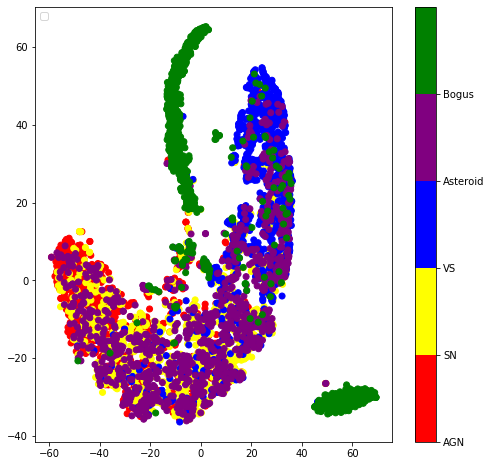

In [74]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 900)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()

W1012 22:31:33.732603 12540 legend.py:1282] No handles with labels found to put in legend.


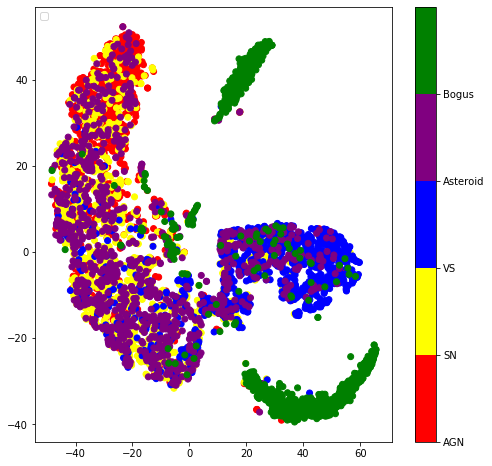

In [75]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=1000,learning_rate = 1000)
tsne_results = tsne.fit_transform(imagenes)

import matplotlib

colors = ['red','yellow','blue','purple','green']
nombres = ['AGN','SN','VS','Asteroid','Bogus']
fig = plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clases, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(nombres)
plt.legend(loc=2)
plt.show()